In [1]:
# 패키지 불러오기
import pandas as pd
import folium
from folium import Marker
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests

# 성관계 시작연령(2005 ~ 2021)

In [2]:
# 성관계 시작연령 데이터 불러오기(2005 ~ 2021)
df = pd.read_csv("C:/python/datas/성관계_시작_연령.csv", header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,성별(1),2005,2005,2005,2006,2006,2006,2007,2007,2007,...,2015,2016,2016,2016,2018,2018,2018,2021,2021,2021
1,성별(1),분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차,...,표준오차,분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차
2,전체,2485,13.6,0.1,3269,13.9,0.1,3618,13.9,0.1,...,0.1,2623,13.1,0.1,2941,13.6,0.1,2702,14.1,0.1
3,남학생,1597,13.4,0.1,2233,13.7,0.1,2601,13.8,0.1,...,0.1,1860,12.9,0.1,1941,13.3,0.1,1692,13.9,0.1
4,여학생,888,14,0.1,1036,14.4,0.1,1017,14.5,0.1,...,0.1,763,13.4,0.1,1000,14.4,0.1,1010,14.3,0.1


In [3]:
# 중복 인덱스를 올바르게 불러오기 위한 전처리
df.to_csv("성관계 시작 연령.csv", index = False)
df = pd.read_csv("성관계 시작 연령.csv", index_col = 0)
df

,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
0,,,,,,,,,,,,,,,,,,,,,
성별(1),2005,2005,2005,2006,2006,2006,2007,2007,2007,2008,...,2015,2016,2016,2016,2018,2018,2018,2021,2021,2021
성별(1),분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),...,표준오차,분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차,분석대상자수 (명),평균연령 (세),표준오차
전체,2485,13.6,0.1,3269,13.9,0.1,3618,13.9,0.1,3580,...,0.1,2623,13.1,0.1,2941,13.6,0.1,2702,14.1,0.1
남학생,1597,13.4,0.1,2233,13.7,0.1,2601,13.8,0.1,2484,...,0.1,1860,12.9,0.1,1941,13.3,0.1,1692,13.9,0.1
여학생,888,14,0.1,1036,14.4,0.1,1017,14.5,0.1,1096,...,0.1,763,13.4,0.1,1000,14.4,0.1,1010,14.3,0.1


In [4]:
# 중복 인덱스를 설정하기
new_header = [df.iloc[0], df.iloc[1]]
df = df[2:]
df.columns = new_header

df

성별(1)       2005                     2006                     2007           \
성별(1) 분석대상자수 (명) 평균연령 (세) 표준오차 분석대상자수 (명) 평균연령 (세) 표준오차 분석대상자수 (명) 평균연령 (세)   
0                                                                             
전체          2485     13.6  0.1       3269     13.9  0.1       3618     13.9   
남학생         1597     13.4  0.1       2233     13.7  0.1       2601     13.8   
여학생          888       14  0.1       1036     14.4  0.1       1017     14.5   

성별(1)            2008  ... 2015       2016                     2018           \
성별(1) 표준오차 분석대상자수 (명)  ... 표준오차 분석대상자수 (명) 평균연령 (세) 표준오차 분석대상자수 (명) 평균연령 (세)   
0                      ...                                                     
전체     0.1       3580  ...  0.1       2623     13.1  0.1       2941     13.6   
남학생    0.1       2484  ...  0.1       1860     12.9  0.1       1941     13.3   
여학생    0.1       1096  ...  0.1        763     13.4  0.1       1000     14.4   

성별(1)            2021                
성별(1) 표준오차 분석대상자수 (명) 평균연령 (세) 표준오차  
0                                    
전체     0.1       2702     14.1  0.1  
남학생    0.1       1692     13.9  0.1  
여학생    0.1       1010     14.3  0.1  

[3 rows x 42 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 전체 to 여학생
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   (2005, 분석대상자수 (명))  3 non-null      object
 1   (2005, 평균연령 (세))    3 non-null      object
 2   (2005, 표준오차)        3 non-null      object
 3   (2006, 분석대상자수 (명))  3 non-null      object
 4   (2006, 평균연령 (세))    3 non-null      object
 5   (2006, 표준오차)        3 non-null      object
 6   (2007, 분석대상자수 (명))  3 non-null      object
 7   (2007, 평균연령 (세))    3 non-null      object
 8   (2007, 표준오차)        3 non-null      object
 9   (2008, 분석대상자수 (명))  3 non-null      object
 10  (2008, 평균연령 (세))    3 non-null      object
 11  (2008, 표준오차)        3 non-null      object
 12  (2009, 분석대상자수 (명))  3 non-null      object
 13  (2009, 평균연령 (세))    3 non-null      object
 14  (2009, 표준오차)        3 non-null      object
 15  (2010, 분석대상자수 (명))  3 non-null      object
 16  (2010, 평균연령 (세))    3 non-null  

In [6]:
# str로 된 숫자를 float으로 변경

# df['2005'] = df['2005'].astype('f')
# df['2006'] = df['2006'].astype('f')
# df['2007'] = df['2007'].astype('f')
# df['2008'] = df['2008'].astype('f')
# df['2009'] = df['2009'].astype('f')
# df['2010'] = df['2010'].astype('f')
# df['2011'] = df['2011'].astype('f')
# df['2012'] = df['2012'].astype('f')
# df['2013'] = df['2013'].astype('f')
# df['2014'] = df['2014'].astype('f')
# df['2015'] = df['2015'].astype('f')
# df['2016'] = df['2016'].astype('f')
# df['2018'] = df['2018'].astype('f')
# df['2021'] = df['2021'].astype('f')

df.iloc[:] = df.iloc[:].astype('f')

C:\Users\user\AppData\Local\Temp\ipykernel_1136\2790438109.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:] = df.iloc[:].astype('f')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 전체 to 여학생
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   (2005, 분석대상자수 (명))  3 non-null      object
 1   (2005, 평균연령 (세))    3 non-null      object
 2   (2005, 표준오차)        3 non-null      object
 3   (2006, 분석대상자수 (명))  3 non-null      object
 4   (2006, 평균연령 (세))    3 non-null      object
 5   (2006, 표준오차)        3 non-null      object
 6   (2007, 분석대상자수 (명))  3 non-null      object
 7   (2007, 평균연령 (세))    3 non-null      object
 8   (2007, 표준오차)        3 non-null      object
 9   (2008, 분석대상자수 (명))  3 non-null      object
 10  (2008, 평균연령 (세))    3 non-null      object
 11  (2008, 표준오차)        3 non-null      object
 12  (2009, 분석대상자수 (명))  3 non-null      object
 13  (2009, 평균연령 (세))    3 non-null      object
 14  (2009, 표준오차)        3 non-null      object
 15  (2010, 분석대상자수 (명))  3 non-null      object
 16  (2010, 평균연령 (세))    3 non-null  

성별(1)       2005                     2006                     2007           \
성별(1) 분석대상자수 (명) 평균연령 (세) 표준오차 분석대상자수 (명) 평균연령 (세) 표준오차 분석대상자수 (명) 평균연령 (세)   
0                                                                             
전체        2485.0     13.6  0.1     3269.0     13.9  0.1     3618.0     13.9   
남학생       1597.0     13.4  0.1     2233.0     13.7  0.1     2601.0     13.8   
여학생        888.0     14.0  0.1     1036.0     14.4  0.1     1017.0     14.5   

성별(1)            2008  ... 2015       2016                     2018           \
성별(1) 표준오차 분석대상자수 (명)  ... 표준오차 분석대상자수 (명) 평균연령 (세) 표준오차 분석대상자수 (명) 평균연령 (세)   
0                      ...                                                     
전체     0.1     3580.0  ...  0.1     2623.0     13.1  0.1     2941.0     13.6   
남학생    0.1     2484.0  ...  0.1     1860.0     12.9  0.1     1941.0     13.3   
여학생    0.1     1096.0  ...  0.1      763.0     13.4  0.1     1000.0     14.4   

성별(1)            2021                
성별(1) 표준오차 분석대상자수 (명) 평균연령 (세) 표준오차  
0                                    
전체     0.1     2702.0     14.1  0.1  
남학생    0.1     1692.0     13.9  0.1  
여학생    0.1     1010.0     14.3  0.1  

[3 rows x 42 columns]

In [9]:
# 바깥쪽 중복인덱스를 리스트화
lis = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2018','2021']
lis_sel = [i for i in lis]

<Figure size 3000x2000 with 0 Axes>

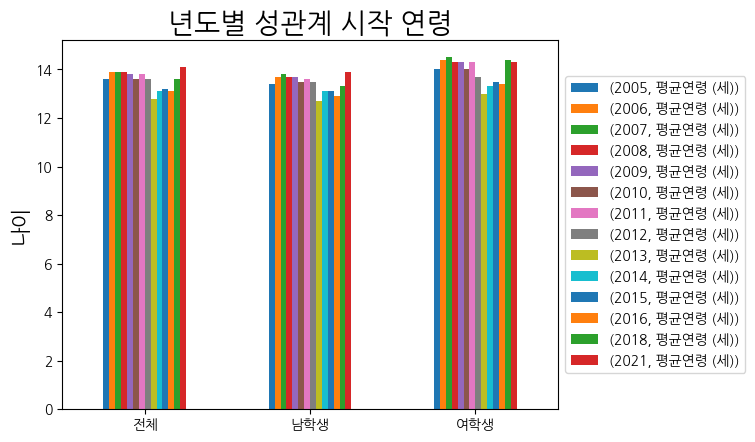

In [10]:
# 년도별 성관계 시작 연령 그래프화
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', labelsize=30)   # x,y축 label 폰트 크기

plt.figure(figsize=(30, 20))

df.loc[:, (lis_sel,'평균연령 (세)')].plot.bar()
plt.title('년도별 성관계 시작 연령', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(None)
plt.ylabel('나이', fontsize = 15)
plt.xticks(rotation = 360)
plt.show()

# Axes 2개로 나누기
# 전체에 대한 꺾은선 그래프

# 성관계 시 임신 예방을 위한 피임 여부(2021년)

In [11]:
# 성관계 시 임신 예방을 위한 피임 여부(2021년)
df2 = pd.read_csv("C:/python/datas/성관계_시_임신_예방을_위한_피임_여부.csv", header = None, encoding = 'cp949')
df2

,0,1,2,3,4,5,6
0,특성별(1),특성별(2),2021,2021,2021,2021,2021
1,특성별(1),특성별(2),사례수 (명),항상 피임을 했다 (%),대부분 피임을 했다 (%),가끔 피임을 했다 (%),전혀 하지 않았다 (%)
2,전체,소계,948,35.8,22.2,21.1,20.9
3,성별,남자,496,39.9,19.1,19.1,21.9
4,성별,여자,451,31.2,25.7,23.3,19.8
5,연령,12~15세,239,32.1,22.3,17.6,28.0
6,연령,16~18세,708,37.0,22.2,22.3,18.5
7,기관유형,청소년상담복지센터(청소년 동반자),117,36.2,26.4,22.5,14.9
8,기관유형,청소년 쉼터 및 자립지원관,194,32.8,21.8,20.0,25.3
9,기관유형,학교 밖 청소년지원센터,252,47.1,24.6,15.2,13.0


In [12]:
# 중복 인덱스를 올바르게 불러오기 위한 전처리
df2.to_csv("성관계 시 피임여부.csv", index = False)
df2 = pd.read_csv("성관계 시 피임여부.csv", index_col = 0)
df2 = df2.set_index(df2.iloc[:,0])
df2

,1,2,3,4,5,6
1,,,,,,
특성별(2),특성별(2),2021,2021,2021,2021,2021
특성별(2),특성별(2),사례수 (명),항상 피임을 했다 (%),대부분 피임을 했다 (%),가끔 피임을 했다 (%),전혀 하지 않았다 (%)
소계,소계,948,35.8,22.2,21.1,20.9
남자,남자,496,39.9,19.1,19.1,21.9
여자,여자,451,31.2,25.7,23.3,19.8
12~15세,12~15세,239,32.1,22.3,17.6,28.0
16~18세,16~18세,708,37.0,22.2,22.3,18.5
청소년상담복지센터(청소년 동반자),청소년상담복지센터(청소년 동반자),117,36.2,26.4,22.5,14.9
청소년 쉼터 및 자립지원관,청소년 쉼터 및 자립지원관,194,32.8,21.8,20.0,25.3


In [13]:
# 중복 인덱스를 설정하기
new_header = [df2.iloc[0], df2.iloc[1]]
df2 = df2[2:]
df2.columns = new_header
df2

특성별(2)                          특성별(2)    2021                               \
특성별(2)                          특성별(2) 사례수 (명) 항상 피임을 했다 (%) 대부분 피임을 했다 (%)   
1                                                                             
소계                                  소계     948          35.8           22.2   
남자                                  남자     496          39.9           19.1   
여자                                  여자     451          31.2           25.7   
12~15세                          12~15세     239          32.1           22.3   
16~18세                          16~18세     708          37.0           22.2   
청소년상담복지센터(청소년 동반자)  청소년상담복지센터(청소년 동반자)     117          36.2           26.4   
청소년 쉼터 및 자립지원관          청소년 쉼터 및 자립지원관     194          32.8           21.8   
학교 밖 청소년지원센터              학교 밖 청소년지원센터     252          47.1           24.6   
소년원 및 보호관찰소                소년원 및 보호관찰소     315          29.7           21.3   
아동보호전문기관                      아동보호전문기관      48          31.8           11.1   
기타                                  기타      21          23.4           13.6   

특성별(2)                                          
특성별(2)             가끔 피임을 했다 (%) 전혀 하지 않았다 (%)  
1                                               
소계                          21.1          20.9  
남자                          19.1          21.9  
여자                          23.3          19.8  
12~15세                      17.6          28.0  
16~18세                      22.3          18.5  
청소년상담복지센터(청소년 동반자)          22.5          14.9  
청소년 쉼터 및 자립지원관              20.0          25.3  
학교 밖 청소년지원센터                15.2          13.0  
소년원 및 보호관찰소                 25.9          23.0  
아동보호전문기관                    17.8          39.3  
기타                          28.4          34.6

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 전체 to 여학생
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   (2005, 분석대상자수 (명))  3 non-null      object
 1   (2005, 평균연령 (세))    3 non-null      object
 2   (2005, 표준오차)        3 non-null      object
 3   (2006, 분석대상자수 (명))  3 non-null      object
 4   (2006, 평균연령 (세))    3 non-null      object
 5   (2006, 표준오차)        3 non-null      object
 6   (2007, 분석대상자수 (명))  3 non-null      object
 7   (2007, 평균연령 (세))    3 non-null      object
 8   (2007, 표준오차)        3 non-null      object
 9   (2008, 분석대상자수 (명))  3 non-null      object
 10  (2008, 평균연령 (세))    3 non-null      object
 11  (2008, 표준오차)        3 non-null      object
 12  (2009, 분석대상자수 (명))  3 non-null      object
 13  (2009, 평균연령 (세))    3 non-null      object
 14  (2009, 표준오차)        3 non-null      object
 15  (2010, 분석대상자수 (명))  3 non-null      object
 16  (2010, 평균연령 (세))    3 non-null  

In [15]:
# str로 된 숫자를 float으로 변경

# df['2005'] = df['2005'].astype('f')

df2.iloc[:,1:] = df2.iloc[:,1:].astype('f')

C:\Users\user\AppData\Local\Temp\ipykernel_1136\3609237565.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.iloc[:,1:] = df2.iloc[:,1:].astype('f')


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 소계 to 기타
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (특성별(2), 특성별(2))        11 non-null     object 
 1   (2021, 사례수 (명))         11 non-null     float32
 2   (2021, 항상 피임을 했다 (%))   11 non-null     float32
 3   (2021, 대부분 피임을 했다 (%))  11 non-null     float32
 4   (2021, 가끔 피임을 했다 (%))   11 non-null     float32
 5   (2021, 전혀 하지 않았다 (%))   11 non-null     float32
dtypes: float32(5), object(1)
memory usage: 396.0+ bytes


In [17]:
# 청소년 피임여부만 남김
sort = df2['2021'][3:5]
sort.index.name = None
sort

특성별(2),사례수 (명),항상 피임을 했다 (%),대부분 피임을 했다 (%),가끔 피임을 했다 (%),전혀 하지 않았다 (%)
12~15세,239.0,32.099998,22.299999,17.600000,28.0
16~18세,708.0,37.000000,22.200001,22.299999,18.5


<Figure size 3000x2000 with 0 Axes>

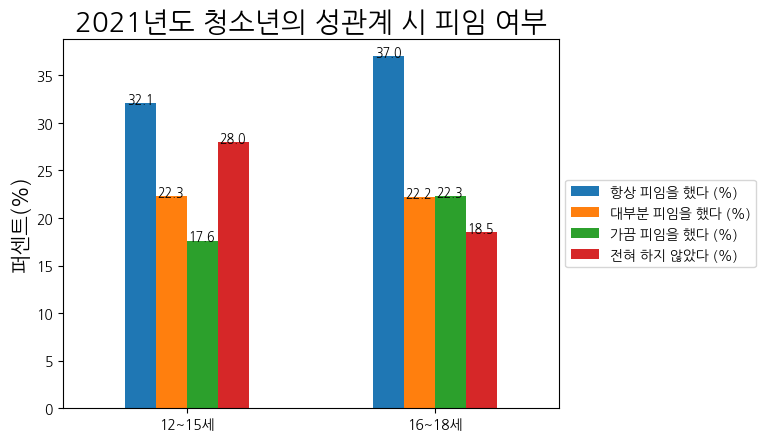

In [18]:
# 2021년도 청소년 피임 여부 조사
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', labelsize=30)   # x,y축 label 폰트 크기

plt.figure(figsize=(30, 20))

ax = sort.iloc[:, 1:].plot.bar()
for patch in ax.patches:
    ax.text(x = patch.get_x() + patch.get_width() / 2,
            y = patch.get_height() + len(df) * 0.001,
            s = f'{(round(patch.get_height(), 2))}',
            ha = 'center',
            size = 9)

plt.title('2021년도 청소년의 성관계 시 피임 여부', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('퍼센트(%)', fontsize = 15)
plt.xticks(rotation = 360)
plt.show()

# 파이차트 2개로 바꾸기

# 서울시 모(母) 합계출산율

In [19]:
# 서울시 모(母) 합계출산율 불러오기

df3 = pd.read_csv("C:/python/datas/합계출산율_및_모의_연령별_출산율.csv", header = None)
df3

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,자치구별(1),1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,자치구별(1),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),...,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수)
2,자치구별(1),15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,...,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세
3,서울특별시,1.7,1.5,1.4,1.3,1.3,2.2,1.8,1.7,1.5,...,1.2,1.2,1,1,0.9,0.7,0.6,0.5,0.3,0.2
4,종로구,NaN,NaN,NaN,0.9,0.5,2.5,2.3,1.4,0.8,...,0.2,NaN,0.5,0.5,NaN,0.5,0.3,0.6,NaN,0
5,중구,NaN,NaN,NaN,1.3,1.8,1.5,3,1.5,2.5,...,2.7,1.6,1.7,1.1,1.2,0.8,NaN,0.5,0.5,0
6,용산구,NaN,NaN,NaN,1.3,1.8,0.9,2.3,2.6,2.1,...,0.8,0.9,1.1,0.6,0.4,0.2,0.6,NaN,NaN,0.5
7,성동구,NaN,NaN,NaN,2.1,2,1.5,2,2.6,1.4,...,1.6,0.8,0.5,0.5,0.6,0.3,0.6,0.2,NaN,0
8,광진구,NaN,NaN,NaN,1.2,0.9,2.7,1.4,2.8,1.4,...,0.9,0.8,0.7,0.6,0.4,0.5,0.4,0.5,0.6,0.3
9,동대문구,NaN,NaN,NaN,1.7,2,2.9,1.2,2.4,2.1,...,1.2,1.3,1.1,0.6,1.3,1,0.9,0.1,0.6,0


In [20]:
# 중복 인덱스를 올바르게 불러오기 위한 전처리
df3.to_csv("서울시 모의 합계출산율.csv", index = False)
df3 = pd.read_csv("서울시 모의 합계출산율.csv", index_col = 0)

df3

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,,,,,,,,,,,,,,,,,,,,,
자치구별(1),1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
자치구별(1),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),...,모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수),모(母)의 연령별 출산율(연령별 여성 천명당 출생아수)
자치구별(1),15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,...,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세
서울특별시,1.7,1.5,1.4,1.3,1.3,2.2,1.8,1.7,1.5,1.5,...,1.2,1.2,1,1,0.9,0.7,0.6,0.5,0.3,0.2
종로구,NaN,NaN,NaN,0.9,0.5,2.5,2.3,1.4,0.8,0.8,...,0.2,NaN,0.5,0.5,NaN,0.5,0.3,0.6,NaN,0
중구,NaN,NaN,NaN,1.3,1.8,1.5,3,1.5,2.5,1.5,...,2.7,1.6,1.7,1.1,1.2,0.8,NaN,0.5,0.5,0
용산구,NaN,NaN,NaN,1.3,1.8,0.9,2.3,2.6,2.1,1.1,...,0.8,0.9,1.1,0.6,0.4,0.2,0.6,NaN,NaN,0.5
성동구,NaN,NaN,NaN,2.1,2,1.5,2,2.6,1.4,2.2,...,1.6,0.8,0.5,0.5,0.6,0.3,0.6,0.2,NaN,0
광진구,NaN,NaN,NaN,1.2,0.9,2.7,1.4,2.8,1.4,1.4,...,0.9,0.8,0.7,0.6,0.4,0.5,0.4,0.5,0.6,0.3


In [21]:
# 중복 인덱스를 설정하기
new_header = [df3.iloc[0], df3.iloc[2]]
df3 = df3[3:]
df3.columns = new_header
df3

자치구별(1),1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
자치구별(1),15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,...,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세,15-19세
0,,,,,,,,,,,,,,,,,,,,,
서울특별시,1.7,1.5,1.4,1.3,1.3,2.2,1.8,1.7,1.5,1.5,...,1.2,1.2,1,1,0.9,0.7,0.6,0.5,0.3,0.2
종로구,NaN,NaN,NaN,0.9,0.5,2.5,2.3,1.4,0.8,0.8,...,0.2,NaN,0.5,0.5,NaN,0.5,0.3,0.6,NaN,0
중구,NaN,NaN,NaN,1.3,1.8,1.5,3,1.5,2.5,1.5,...,2.7,1.6,1.7,1.1,1.2,0.8,NaN,0.5,0.5,0
용산구,NaN,NaN,NaN,1.3,1.8,0.9,2.3,2.6,2.1,1.1,...,0.8,0.9,1.1,0.6,0.4,0.2,0.6,NaN,NaN,0.5
성동구,NaN,NaN,NaN,2.1,2,1.5,2,2.6,1.4,2.2,...,1.6,0.8,0.5,0.5,0.6,0.3,0.6,0.2,NaN,0
광진구,NaN,NaN,NaN,1.2,0.9,2.7,1.4,2.8,1.4,1.4,...,0.9,0.8,0.7,0.6,0.4,0.5,0.4,0.5,0.6,0.3
동대문구,NaN,NaN,NaN,1.7,2,2.9,1.2,2.4,2.1,2.1,...,1.2,1.3,1.1,0.6,1.3,1,0.9,0.1,0.6,0
중랑구,NaN,NaN,NaN,2.2,2.1,2.5,1.8,2.4,1.9,1.8,...,2,2.1,1.4,1.1,1,0.6,0.6,0.5,0.5,0.1


In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 서울특별시 to 강동구
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   (1997, 15-19세)  1 non-null      object
 1   (1998, 15-19세)  1 non-null      object
 2   (1999, 15-19세)  1 non-null      object
 3   (2000, 15-19세)  26 non-null     object
 4   (2001, 15-19세)  26 non-null     object
 5   (2002, 15-19세)  26 non-null     object
 6   (2003, 15-19세)  26 non-null     object
 7   (2004, 15-19세)  26 non-null     object
 8   (2005, 15-19세)  26 non-null     object
 9   (2006, 15-19세)  26 non-null     object
 10  (2007, 15-19세)  26 non-null     object
 11  (2008, 15-19세)  26 non-null     object
 12  (2009, 15-19세)  25 non-null     object
 13  (2010, 15-19세)  26 non-null     object
 14  (2011, 15-19세)  26 non-null     object
 15  (2012, 15-19세)  26 non-null     object
 16  (2013, 15-19세)  25 non-null     object
 17  (2014, 15-19세)  26 non-null     object
 18  (2015, 15-19

In [23]:
# str로 된 숫자를 float으로 변경
df3
df3.iloc[:] = df3.iloc[:].astype('f')

C:\Users\user\AppData\Local\Temp\ipykernel_1136\699957593.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.iloc[:] = df3.iloc[:].astype('f')


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 서울특별시 to 강동구
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   (1997, 15-19세)  1 non-null      object
 1   (1998, 15-19세)  1 non-null      object
 2   (1999, 15-19세)  1 non-null      object
 3   (2000, 15-19세)  26 non-null     object
 4   (2001, 15-19세)  26 non-null     object
 5   (2002, 15-19세)  26 non-null     object
 6   (2003, 15-19세)  26 non-null     object
 7   (2004, 15-19세)  26 non-null     object
 8   (2005, 15-19세)  26 non-null     object
 9   (2006, 15-19세)  26 non-null     object
 10  (2007, 15-19세)  26 non-null     object
 11  (2008, 15-19세)  26 non-null     object
 12  (2009, 15-19세)  25 non-null     object
 13  (2010, 15-19세)  26 non-null     object
 14  (2011, 15-19세)  26 non-null     object
 15  (2012, 15-19세)  26 non-null     object
 16  (2013, 15-19세)  25 non-null     object
 17  (2014, 15-19세)  26 non-null     object
 18  (2015, 15-19

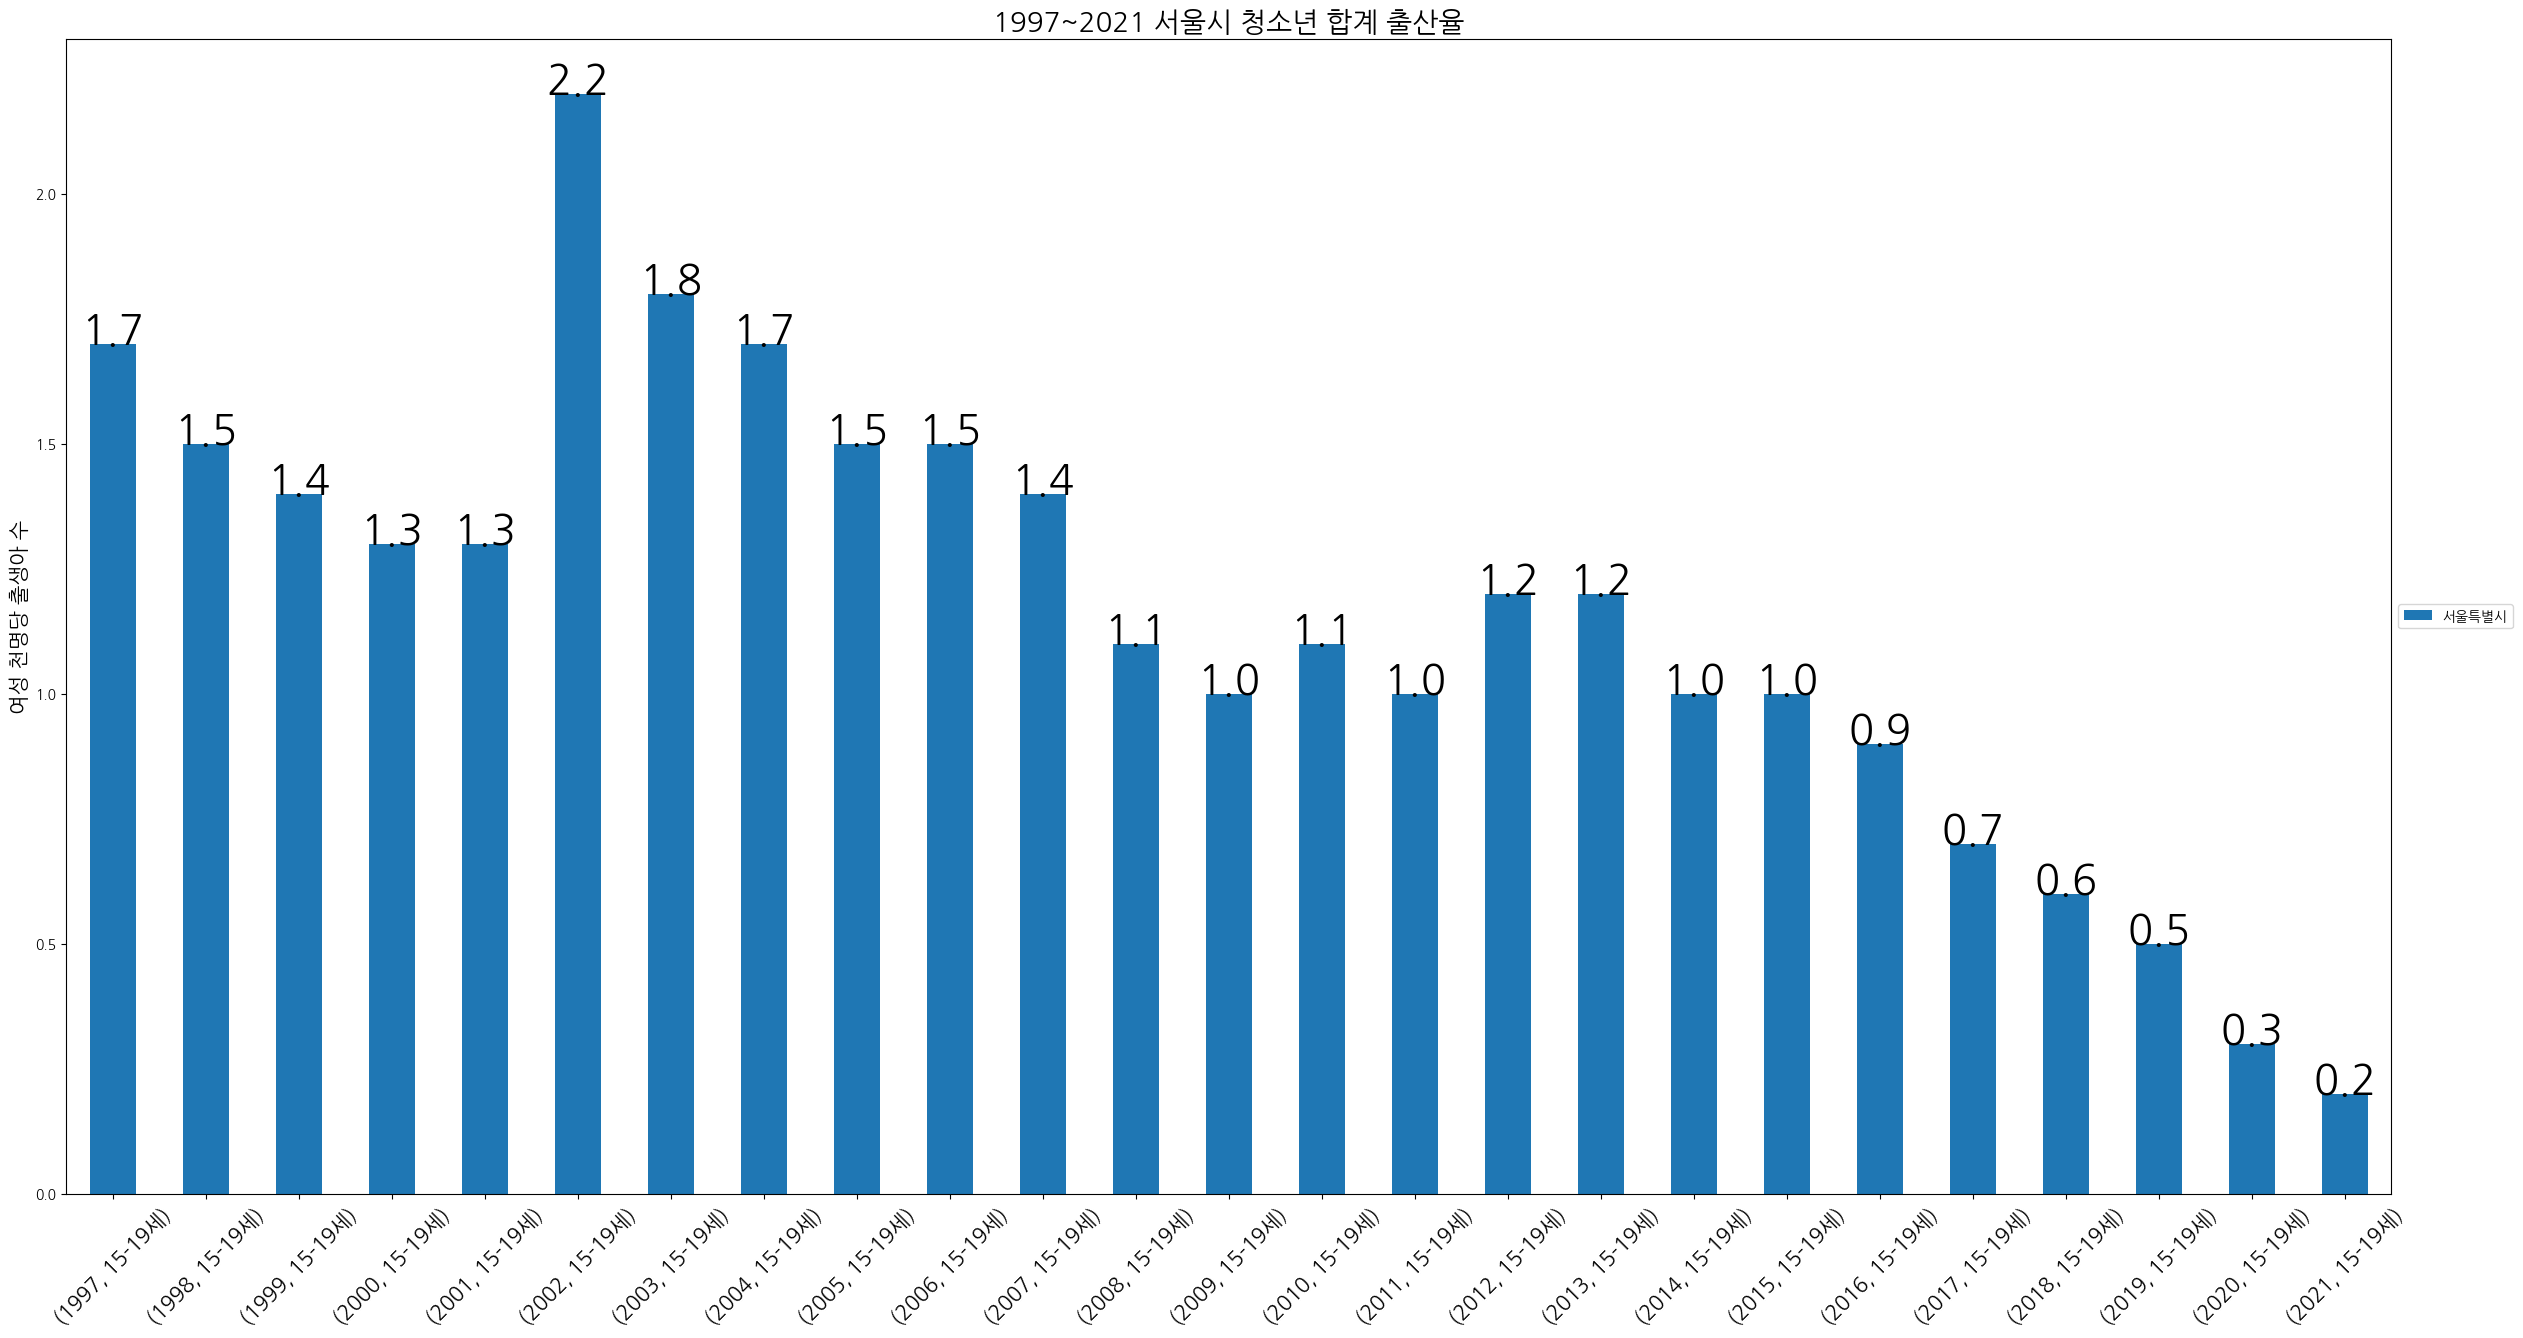

In [25]:
# 서울시 모의 합계출산율
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', labelsize=30)   # x,y축 label 폰트 크기

plt.figure(figsize=(30, 15))

ax = df3.iloc[0, :].plot.bar()
for patch in ax.patches:
    ax.text(x = patch.get_x() + patch.get_width() / 2,
            y = patch.get_height() + len(df) * 0.001,
            s = f'{(round(patch.get_height(), 2))}',
            ha = 'center',
            size = 30)

plt.title('1997~2021 서울시 청소년 합계 출산율', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('여성 천명당 출생아 수', fontsize = 15)
plt.xlabel(None)
plt.xticks(rotation = 45, fontsize = 15)
plt.show()

# 그리드로 배경을 넣기 (이쁘게 색깔넣기)

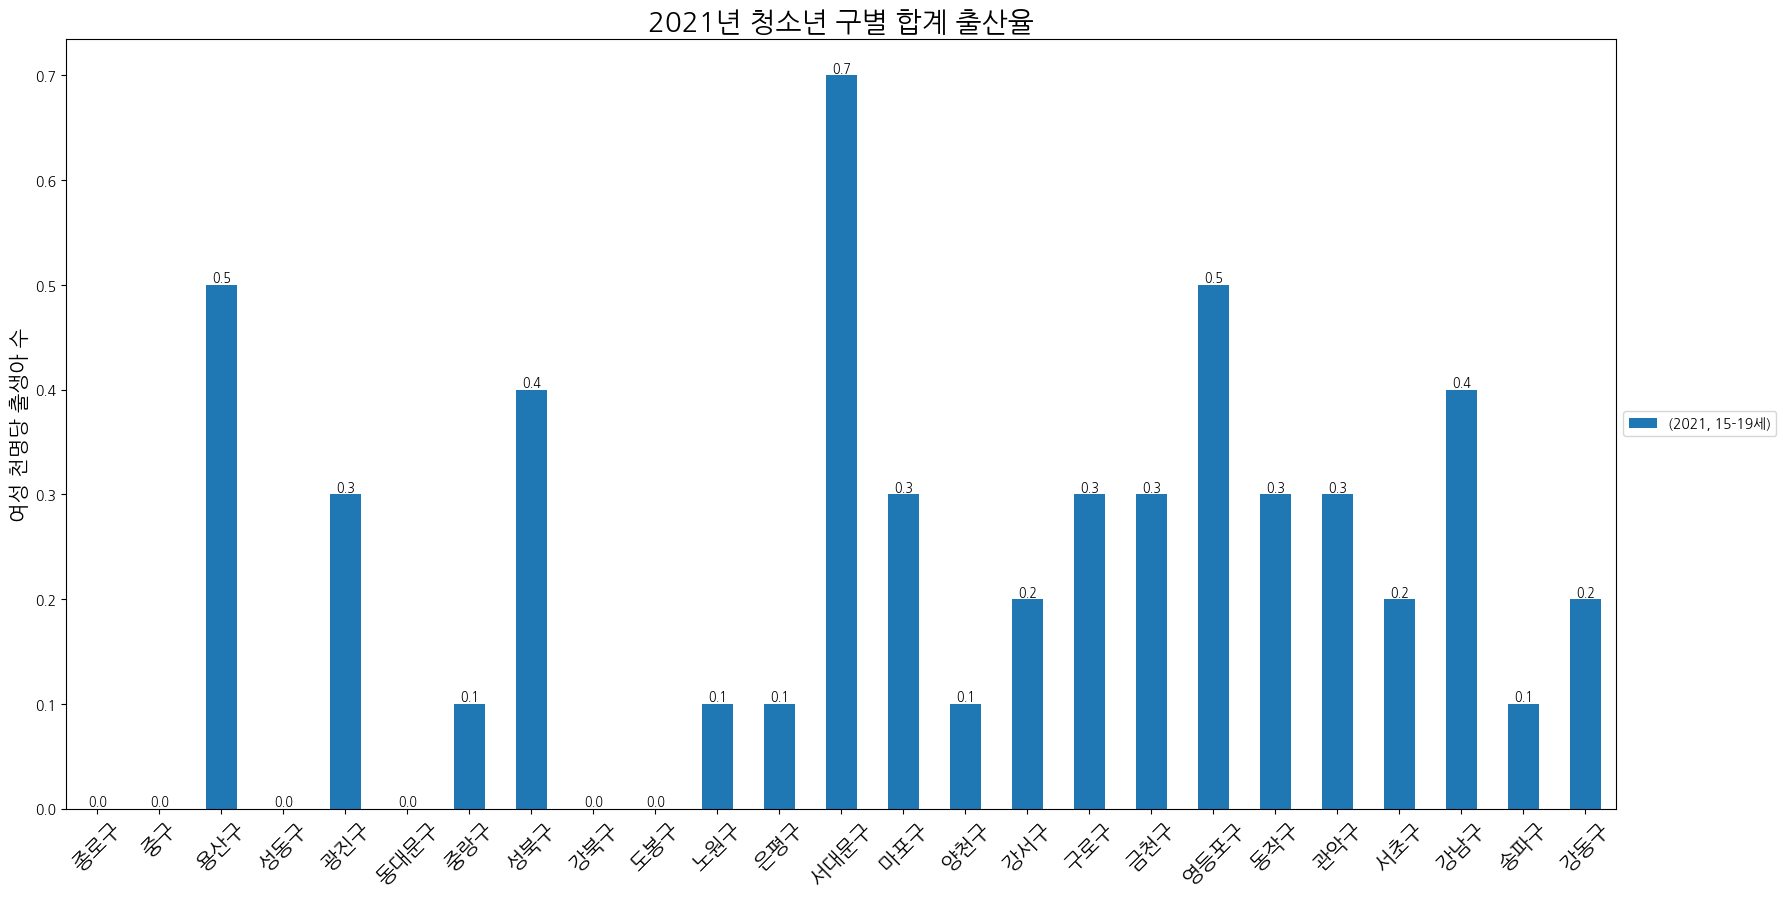

In [26]:
# 2021년 서울시 자치구별 합계 출산율
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', labelsize=30)   # x,y축 label 폰트 크기

plt.figure(figsize=(20, 10))

ax = df3.iloc[1:, -1].plot.bar()
for patch in ax.patches:
    ax.text(x = patch.get_x() + patch.get_width() / 2,
            y = patch.get_height() + len(df) * 0.001,
            s = f'{(round(patch.get_height(), 2))}',
            ha = 'center',
            size = 9)

plt.title('2021년 청소년 구별 합계 출산율', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('여성 천명당 출생아 수', fontsize = 15)
plt.xlabel(None)
plt.xticks(rotation = 45, fontsize = 15)
plt.show()

In [27]:
birth2021 = df3.iloc[1:, -1]
birth2021

0
종로구     0.0
중구      0.0
용산구     0.5
성동구     0.0
광진구     0.3
동대문구    0.0
중랑구     0.1
성북구     0.4
강북구     0.0
도봉구     0.0
노원구     0.1
은평구     0.1
서대문구    0.7
마포구     0.3
양천구     0.1
강서구     0.2
구로구     0.3
금천구     0.3
영등포구    0.5
동작구     0.3
관악구     0.3
서초구     0.2
강남구     0.4
송파구     0.1
강동구     0.2
Name: (2021, 15-19세), dtype: object

# 청소년 인구

In [28]:
# 청소년 인구 불러오기

df4 = pd.read_csv("C:/python/datas/청소년인구.csv", header = None)
df4

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,자치구별(1),자치구별(2),2000,2000,2001,2001,2002,2002,2003,2003,...,2018,2018,2019,2019,2020,2020,2021,2021,2022,2022
1,자치구별(1),자치구별(2),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),...,0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명)
2,자치구별(1),자치구별(2),소계,구성비 (%),소계,구성비 (%),소계,구성비 (%),소계,구성비 (%),...,소계,구성비 (%),소계,구성비 (%),소계,구성비 (%),소계,구성비 (%),소계,구성비 (%)
3,합계,소계,2527901,24.5,2434051,23.7,2354800,23.1,2300473,22.6,...,1437449,14.7,1370602,14.1,1310205,13.6,1255170,13.2,1208208,12.8
4,합계,종로구,41299,22.2,39753,21.6,38300,21.1,37115,20.9,...,19179,12.5,18167,12,17058,11.4,16062,11.1,15246,10.8
5,합계,중구,29790,21.1,29237,20.4,27345,19.8,26106,19.4,...,14145,11.3,13494,10.7,12650,10.1,11899,9.7,11418,9.5
6,합계,용산구,51304,21.4,50363,20.9,47632,20.3,46112,19.9,...,29557,12.9,28214,12.3,27060,11.8,25567,11.5,24516,11.2
7,합계,성동구,80927,23.7,78200,22.9,76201,22.4,73712,21.7,...,42774,13.9,40214,13.4,37495,12.8,35730,12.5,34345,12.2
8,합계,광진구,98057,25.1,94108,24.2,90778,23.5,88335,22.9,...,48510,13.6,45248,12.9,42214,12.2,39701,11.7,37876,11.2
9,합계,동대문구,85242,22.4,82975,21.7,80577,21.1,79295,20.7,...,45602,13.1,43391,12.5,41131,12,39376,11.7,38236,11.4


In [29]:
# 중복 인덱스를 올바르게 불러오기 위한 전처리
df4.to_csv("서울시 청소년인구.csv", index = False)
df4 = pd.read_csv("서울시 청소년인구.csv", index_col = 0)
df4 = df4.set_index(df4.iloc[:,0])
df4

,1,2,3,4,5,6,7,8,9,10,...,38,39,40,41,42,43,44,45,46,47
1,,,,,,,,,,,,,,,,,,,,,
자치구별(2),자치구별(2),2000,2000,2001,2001,2002,2002,2003,2003,2004,...,2018,2018,2019,2019,2020,2020,2021,2021,2022,2022
자치구별(2),자치구별(2),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),...,0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명),0세-18세 (명)
자치구별(2),자치구별(2),소계,구성비 (%),소계,구성비 (%),소계,구성비 (%),소계,구성비 (%),소계,...,소계,구성비 (%),소계,구성비 (%),소계,구성비 (%),소계,구성비 (%),소계,구성비 (%)
소계,소계,2527901,24.5,2434051,23.7,2354800,23.1,2300473,22.6,2258385,...,1437449,14.7,1370602,14.1,1310205,13.6,1255170,13.2,1208208,12.8
종로구,종로구,41299,22.2,39753,21.6,38300,21.1,37115,20.9,35504,...,19179,12.5,18167,12,17058,11.4,16062,11.1,15246,10.8
중구,중구,29790,21.1,29237,20.4,27345,19.8,26106,19.4,25064,...,14145,11.3,13494,10.7,12650,10.1,11899,9.7,11418,9.5
용산구,용산구,51304,21.4,50363,20.9,47632,20.3,46112,19.9,45070,...,29557,12.9,28214,12.3,27060,11.8,25567,11.5,24516,11.2
성동구,성동구,80927,23.7,78200,22.9,76201,22.4,73712,21.7,72307,...,42774,13.9,40214,13.4,37495,12.8,35730,12.5,34345,12.2
광진구,광진구,98057,25.1,94108,24.2,90778,23.5,88335,22.9,85529,...,48510,13.6,45248,12.9,42214,12.2,39701,11.7,37876,11.2


In [30]:
# 중복 인덱스를 설정하기
new_header = [df4.iloc[0], df4.iloc[2]]
df4 = df4[3:]
df4.columns = new_header
df4

자치구별(2) 자치구별(2)     2000             2001             2002             2003  \
자치구별(2) 자치구별(2)       소계 구성비 (%)       소계 구성비 (%)       소계 구성비 (%)       소계   
1                                                                             
소계           소계  2527901    24.5  2434051    23.7  2354800    23.1  2300473   
종로구         종로구    41299    22.2    39753    21.6    38300    21.1    37115   
중구           중구    29790    21.1    29237    20.4    27345    19.8    26106   
용산구         용산구    51304    21.4    50363    20.9    47632    20.3    46112   
성동구         성동구    80927    23.7    78200    22.9    76201    22.4    73712   
광진구         광진구    98057    25.1    94108    24.2    90778    23.5    88335   
동대문구       동대문구    85242    22.4    82975    21.7    80577    21.1    79295   
중랑구         중랑구   119100      26   111681    24.9   106112      24   101400   
성북구         성북구   104275    22.6    98548    21.9    94396    21.3    95211   
강북구         강북구    79624    22.6    76722    21.8    77687    21.5    76245   
도봉구         도봉구   100929    27.2    98039    26.4    94703    25.5    93136   
노원구         노원구   177744    28.1   176103    27.2   170242    26.5   164888   
은평구         은평구   115431    24.6   111202    23.8   108886    23.2   107863   
서대문구       서대문구    84394      23    82277    22.5    79453    21.9    76913   
마포구         마포구    86218    22.3    81903    21.6    78980      21    78699   
양천구         양천구   134002    27.5   130085    26.9   128203    26.5   127602   
강서구         강서구   137493    26.4   131806    25.3   128511    24.3   127441   
구로구         구로구   100349    24.9    99716      24    95967    23.2    93491   
금천구         금천구    68024    25.5    63953    24.6    62144    23.8    60413   
영등포구       영등포구    97138    23.9    93848    23.1    91615    22.4    87991   
동작구         동작구    94328    22.7    88803    21.9    85480    21.2    84911   
관악구         관악구   116376    22.2   111839    21.2   105754    20.3   102407   
서초구         서초구    90778    22.8    87844    22.3    85921    22.1    86794   
강남구         강남구   128447    23.3   123294    22.8   120488    22.5   118743   
송파구         송파구   173724    26.2   165964    25.3   159322    24.6   149492   
강동구         강동구   132908    26.8   125788    25.7   120103    24.9   116158   

자치구별(2)             2004  ...     2018             2019             2020  \
자치구별(2) 구성비 (%)       소계  ...       소계 구성비 (%)       소계 구성비 (%)       소계   
1                         ...                                              
소계         22.6  2258385  ...  1437449    14.7  1370602    14.1  1310205   
종로구        20.9    35504  ...    19179    12.5    18167      12    17058   
중구         19.4    25064  ...    14145    11.3    13494    10.7    12650   
용산구        19.9    45070  ...    29557    12.9    28214    12.3    27060   
성동구        21.7    72307  ...    42774    13.9    40214    13.4    37495   
광진구        22.9    85529  ...    48510    13.6    45248    12.9    42214   
동대문구       20.7    76872  ...    45602    13.1    43391    12.5    41131   
중랑구        23.3    98531  ...    52738    13.1    49127    12.4    46312   
성북구          21    93478  ...    66184    15.2    64592    14.6    61127   
강북구        21.1    75172  ...    40762    12.8    37670      12    34835   
도봉구        24.7    92242  ...    48041    14.2    44458    13.3    41113   
노원구        26.1   161122  ...    90994    16.7    84769    15.9    79877   
은평구        22.7   107089  ...    70925    14.7    66910    13.9    63704   
서대문구       21.6    74699  ...    43313      14    41516    13.4    40673   
마포구        20.7    78385  ...    54840    14.6    52329      14    49806   
양천구        26.2   128222  ...    83574      18    79612    17.4    77043   
강서구        23.7   125527  ...    90328    15.1    85128    14.4    78957   
구로구        22.6    92105  ...    60006    14.8    57914    14.2    54779   
금천구        23.1    58990  ...    29249    12.5    27278    11.7    25307   
영등포구       21.8    86877  ...    490

In [31]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 소계 to 강동구
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   (자치구별(2), 자치구별(2))  26 non-null     object
 1   (2000, 소계)          26 non-null     object
 2   (2000, 구성비 (%))     26 non-null     object
 3   (2001, 소계)          26 non-null     object
 4   (2001, 구성비 (%))     26 non-null     object
 5   (2002, 소계)          26 non-null     object
 6   (2002, 구성비 (%))     26 non-null     object
 7   (2003, 소계)          26 non-null     object
 8   (2003, 구성비 (%))     26 non-null     object
 9   (2004, 소계)          26 non-null     object
 10  (2004, 구성비 (%))     26 non-null     object
 11  (2005, 소계)          26 non-null     object
 12  (2005, 구성비 (%))     26 non-null     object
 13  (2006, 소계)          26 non-null     object
 14  (2006, 구성비 (%))     26 non-null     object
 15  (2007, 소계)          26 non-null     object
 16  (2007, 구성비 (%))     26 non-null

In [32]:
# str로 된 숫자를 float으로 변경

df4.iloc[:,1:] = df4.iloc[:,1:].astype('f')

C:\Users\user\AppData\Local\Temp\ipykernel_1136\3006167951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.iloc[:,1:] = df4.iloc[:,1:].astype('f')


In [33]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 소계 to 강동구
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (자치구별(2), 자치구별(2))  26 non-null     object 
 1   (2000, 소계)          26 non-null     float32
 2   (2000, 구성비 (%))     26 non-null     float32
 3   (2001, 소계)          26 non-null     float32
 4   (2001, 구성비 (%))     26 non-null     float32
 5   (2002, 소계)          26 non-null     float32
 6   (2002, 구성비 (%))     26 non-null     float32
 7   (2003, 소계)          26 non-null     float32
 8   (2003, 구성비 (%))     26 non-null     float32
 9   (2004, 소계)          26 non-null     float32
 10  (2004, 구성비 (%))     26 non-null     float32
 11  (2005, 소계)          26 non-null     float32
 12  (2005, 구성비 (%))     26 non-null     float32
 13  (2006, 소계)          26 non-null     float32
 14  (2006, 구성비 (%))     26 non-null     float32
 15  (2007, 소계)          26 non-null     float32
 16  (2007, 구성비 (%

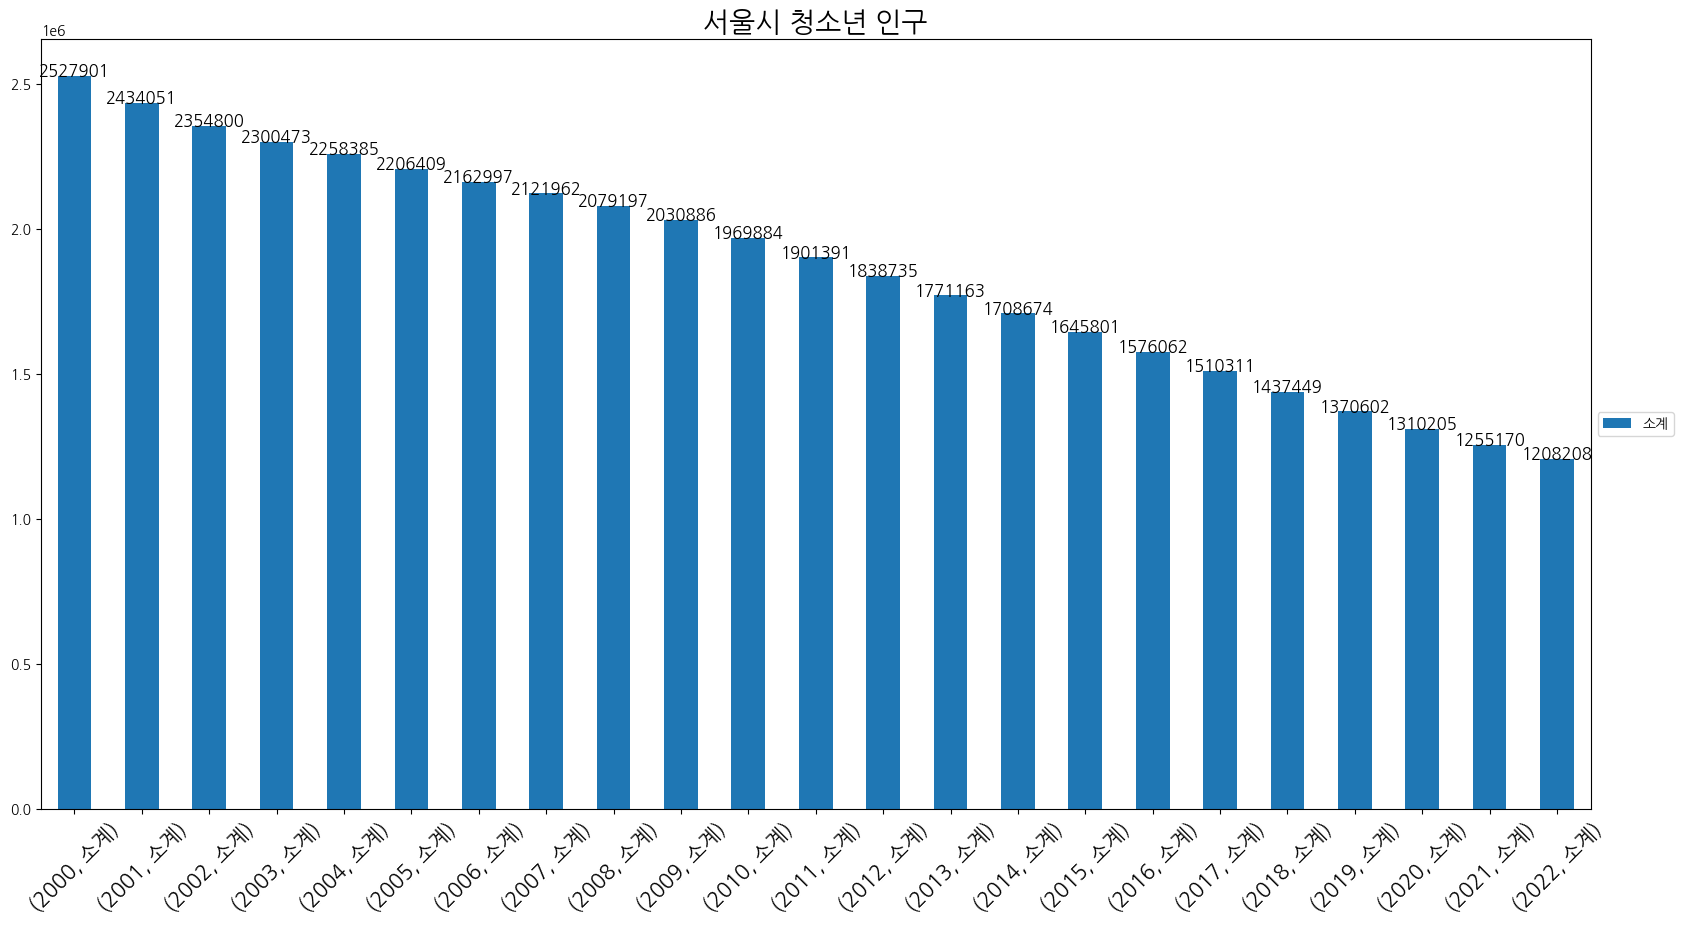

In [37]:
# 서울시 청소년 인구
plt.rcParams['font.family'] = 'NanumGothic'
plt.rc('axes', labelsize=30)   # x,y축 label 폰트 크기

plt.figure(figsize=(20, 10))

ax = df4.iloc[0,1::2].plot.bar()
for patch in ax.patches:
    ax.text(x = patch.get_x() + patch.get_width() / 2,
            y = patch.get_height() + len(df) * 0.001,
            s = f'{(int(patch.get_height()))}',
            ha = 'center',
            size = 12)
    
plt.title('서울시 청소년 인구', fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel(None)
plt.xticks(rotation = 45, fontsize = 15)
plt.show()